## Optimized Grover's algorithm with less gates in the diffuser

Import required packages and initialize the least busy backend

In [7]:
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from numpy import pi

provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")
device = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 3 and 
                                   not x.configuration().simulator and x.status().operational==True))

ibmqfactory.load_account:WARNING:2022-05-13 21:44:27,441: Credentials are already in use. The existing account in the session will be replaced.


Define the registers

In [8]:
qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

Oracle : the states are transformed to facilitate the amplitude amplification

In [9]:
circuit.rx(pi/2, qreg_q[0])
circuit.rx(pi/2, qreg_q[1])
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.cu1(pi, qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])

<ipython-input-9-eadadc2b09cb>:5: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circuit.cu1(pi, qreg_q[0], qreg_q[1])


Diffuser : the amplitude amplification is realized without breacking entanglement

In [10]:
circuit.barrier(qreg_q[0], qreg_q[1])
circuit.rx(pi/2, qreg_q[0])
circuit.rx(pi/2, qreg_q[1])
circuit.cu1(pi, qreg_q[0], qreg_q[1])
circuit.rx(-pi/2, qreg_q[0])
circuit.rx(-pi/2, qreg_q[1])
circuit.measure_all()

<ipython-input-10-95fe1e471c2e>:4: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  circuit.cu1(pi, qreg_q[0], qreg_q[1])


Simulation of the circuit

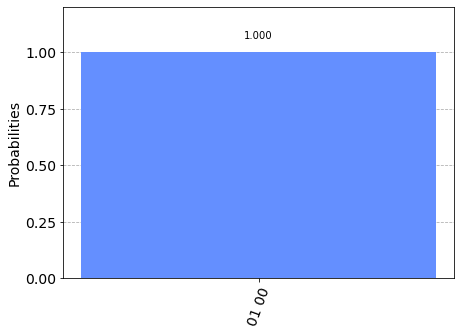

In [11]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

Processing of the circuit on quantum hardware

Job Status: job has successfully run


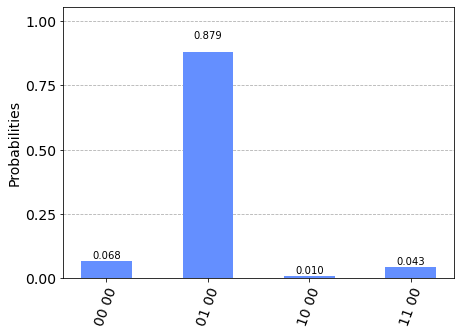

In [12]:
# Run on the least busy backend
transpiled_grover_circuit = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

results = job.result()
answer = results.get_counts(circuit)
plot_histogram(answer)

Visualize the circuit

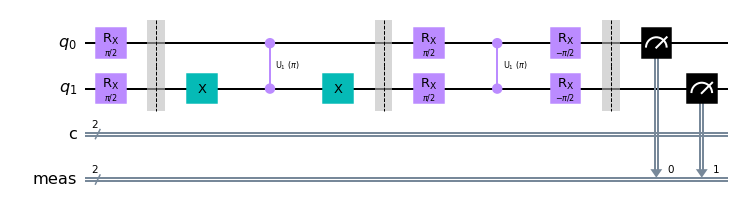

In [13]:
circuit.draw(output="mpl")